# Example usage of the Isolation Forest Robustness package

In [1]:
%load_ext autoreload
%autoreload 2

from anomaly_detection_robustness.graph import Node, Graph

## Create graph nodes

In [2]:
r1 = Node(2, 'root 1')
r2 = Node(2, 'root 2')

c1 = Node(3, 'child 1')
c1.add_parent(r1)
c1.add_parent(r2)

nodes = [r1, r2, c1]
graph = Graph(nodes=nodes)

## Sample observations

In [3]:
nr_observations = 10_000
graph.sample(nr_observations)

## Insert and label anomalies

In [4]:
graph.label(contamination=.005, nr_features_to_change=len(nodes))

## See how well the Isolation Forest performs

Nr. of features:  3
Labels:
 0    9970
1      30
dtype: int64

Confusion matrix
 [[9950    0]
 [  20   30]]

 ROC AUC score 0.97


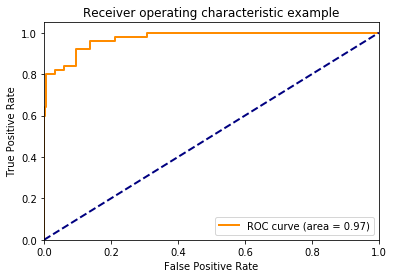

In [5]:
graph.score()

## Sanity check
### Let anomalies be similar to other data points and check if performance is random

Nr. of features:  3
Labels:
 0    9970
1      30
dtype: int64

Confusion matrix
 [[9920   30]
 [  50    0]]

 ROC AUC score 0.53


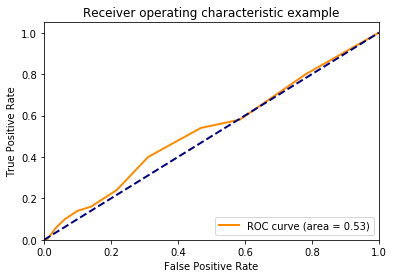

In [6]:
graph.label(contamination=0.005, nr_features_to_change=0)
graph.score()